# Coursera_Capstone

This notebook will be used for developing a supervised macine learning model for predicting the severity of an accident using the shared data of Seattle city.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm, datasets
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import log_loss

In [2]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [3]:
#Import collision data in a DataFrame df
df = pd.read_csv("Data-Collisions.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#Removed unwanted columns 
#'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 
#'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 
#'INCDATE', 'SDOT_COLCODE', 'SDOT_COLDESC', 'SDOTCOLNUM', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 
#'CROSSWALKKEY', 'HITPARKEDCAR'

df.drop(['OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 
         'INCDATE', 'SDOT_COLCODE', 'SDOT_COLDESC', 'SDOTCOLNUM', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 
         'CROSSWALKKEY', 'HITPARKEDCAR'], inplace=True, axis=1)

In [5]:
#DELETE rows with empty cells from 
#'X', 'Y', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'UNDERINFL', 'WEATHER', 'ROADCOND' AND 'LIGHTCOND'
df.dropna(subset=['X'], inplace=True)
df.dropna(subset=['Y'], inplace=True)
df.dropna(subset=['COLLISIONTYPE'], inplace=True)
df.dropna(subset=['JUNCTIONTYPE'], inplace=True)
df.dropna(subset=['UNDERINFL'], inplace=True)
df.dropna(subset=['WEATHER'], inplace=True)
df.dropna(subset=['ROADCOND'], inplace=True)
df.dropna(subset=['LIGHTCOND'], inplace=True)

In [6]:
df['WEATHER'].replace(to_replace=['Unknown','Other'], value=['Unknown-Weather','Unknown-Weather'], inplace=True)
df['ROADCOND'].replace(to_replace=['Unknown','Other'], value=['Unknown-Road','Unknown-Road'], inplace=True)
df['LIGHTCOND'].replace(to_replace=['Unknown','Other'], value=['Unknown-Light','Unknown-Light'], inplace=True)
df['JUNCTIONTYPE'].replace(to_replace=['Unknown'], value=['Unknown-Location'], inplace=True)
df['COLLISIONTYPE'].replace(to_replace=['Other'], value=['Other-CollisionType'], inplace=True)

In [7]:
#Update blank cells in columns 'PEDROWNOTGRNT' with 'N'
df['SPEEDING'].replace(np.nan, 'N', inplace=True)
df['PEDROWNOTGRNT'].replace(np.nan, 'N', inplace=True)
df['INATTENTIONIND'].replace(np.nan, 'N', inplace=True)

In [8]:
#Convert 'Y' -> 1 and 'N' -> 0 for columns 'PEDROWNOTGRNT'
df['SPEEDING'].replace(to_replace=['N','Y'], value=[0,1], inplace=True)
df['PEDROWNOTGRNT'].replace(to_replace=['N','Y'], value=[0,1], inplace=True)
df['INATTENTIONIND'].replace(to_replace=['N','Y'], value=[0,1], inplace=True)
df['UNDERINFL'].replace(to_replace=['N','Y'], value=[0,1], inplace=True)
df['UNDERINFL'].replace(to_replace=['0','1'], value=[0,1], inplace=True)

In [9]:
#Convert column to DateTime
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])

In [10]:
#Add Columns 'YEAR', MONTH', 'DAYOFMONTH', 'HOUROFDAY', 'DAYOFWEEK', 'WEEKDAY', 'NAMEOFMONTH' 
df['YEAR'] = df['INCDTTM'].dt.year
df['DAYOFMONTH'] = df['INCDTTM'].dt.day
df['HOUROFDAY'] = df['INCDTTM'].dt.hour
df['WEEKDAY'] = df['INCDTTM'].dt.strftime("%A")
df['NAMEOFMONTH'] = df['INCDTTM'].dt.strftime("%B")
df.drop(['INCDTTM'], inplace=True, axis=1)

In [11]:
#Remove duplicate rows if any
df.drop_duplicates()

,SEVERITYCODE,X,Y,COLLISIONTYPE,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,YEAR,DAYOFMONTH,HOUROFDAY,WEEKDAY,NAMEOFMONTH
0,2,-122.323148,47.703140,Angles,At Intersection (intersection related),0,0,Overcast,Wet,Daylight,0,0,2013,27,14,Wednesday,March
1,1,-122.347294,47.647172,Sideswipe,Mid-Block (not related to intersection),0,0,Raining,Wet,Dark - Street Lights On,0,0,2006,20,18,Wednesday,December
2,1,-122.334540,47.607871,Parked Car,Mid-Block (not related to intersection),0,0,Overcast,Dry,Daylight,0,0,2004,18,10,Thursday,November
3,1,-122.334803,47.604803,Other-CollisionType,Mid-Block (not related to intersection),0,0,Clear,Dry,Daylight,0,0,2013,29,9,Friday,March
4,2,-122.306426,47.545739,Angles,At Intersection (intersection related),0,0,Raining,Wet,Daylight,0,0,2004,28,8,Wednesday,January
5,1,-122.387598,47.690575,Angles,At Intersection (intersection related),0,0,Clear,Dry,Daylight,0,0,2019,20,17,Saturday,April
6,1,-122.338485,47.618534,Angles,At Intersection (intersection related),0,0,Raining,Wet,Daylight,0,0,2008,9,0,Tuesday,December
7,2,-122.320780,47.614076,Cycles,At Intersection (intersection related),0,0,Clear,Dry,Daylight,0,0,2020,15,17,Wednesday,April
8,1,-122.335930,47.611904,Parked Car,Mid-Block (not related to intersection),0,0,Clear,Dry,Daylight,0,0,2006,15,13,Thursday,June
9,2,-122.384700,47.528475,Angles,At Intersection (intersection related),0,0,Clear,Dry,Daylight,0,0,2006,20,15,Monday,March


In [12]:
#Reset index
df = df.reset_index(drop=True)

In [13]:
#Rename columns in one go 
df.rename( columns={'SEVERITYCODE':'SEVERITY', 'JUNCTIONTYPE':'LOCATION', 'INATTENTIONIND':'INATTENTION', 
                    'UNDERINFL':'ALCOHOLUSE', 'ROADCOND':'ROAD', 'LIGHTCOND':'LIGHT'}, inplace=True )

In [14]:
#Write data to a csv file that can be used later
df.to_csv('final.csv',index=False,header=True)

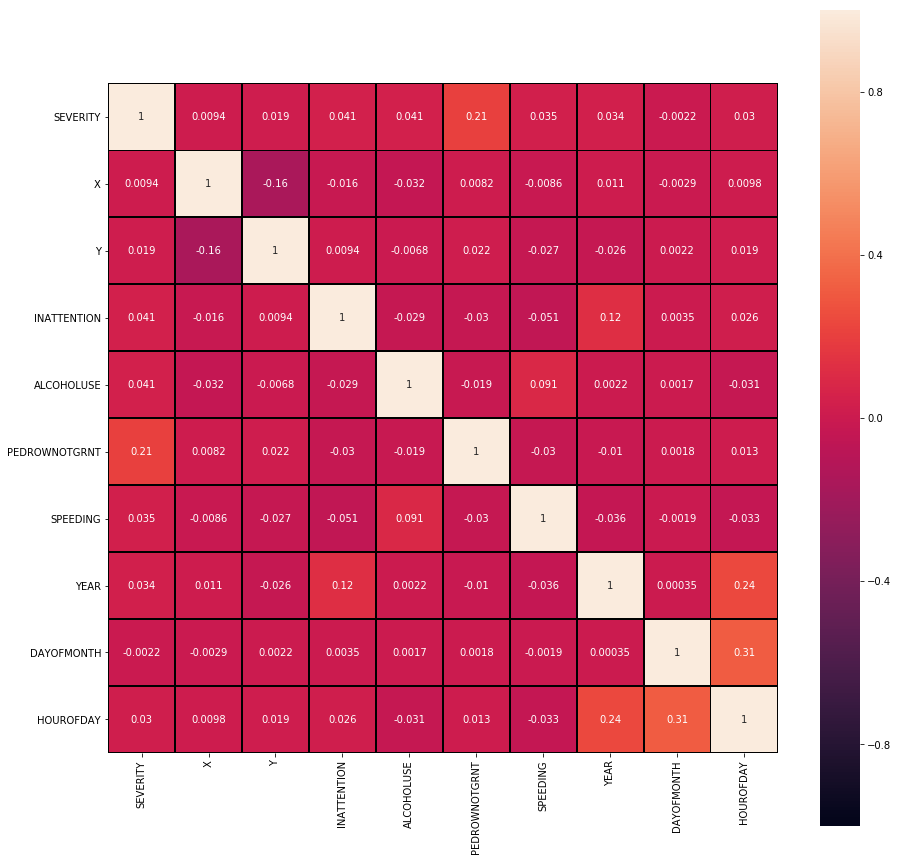

In [15]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax, linecolor='k', square=True, mask=False, vmin=-1, vmax=1, 
            cbar_kws={"orientation": "vertical"}, cbar=True)

In [16]:
#Create a new dataframe with data only severe accidents
df1 = df[df['SEVERITY']==2]

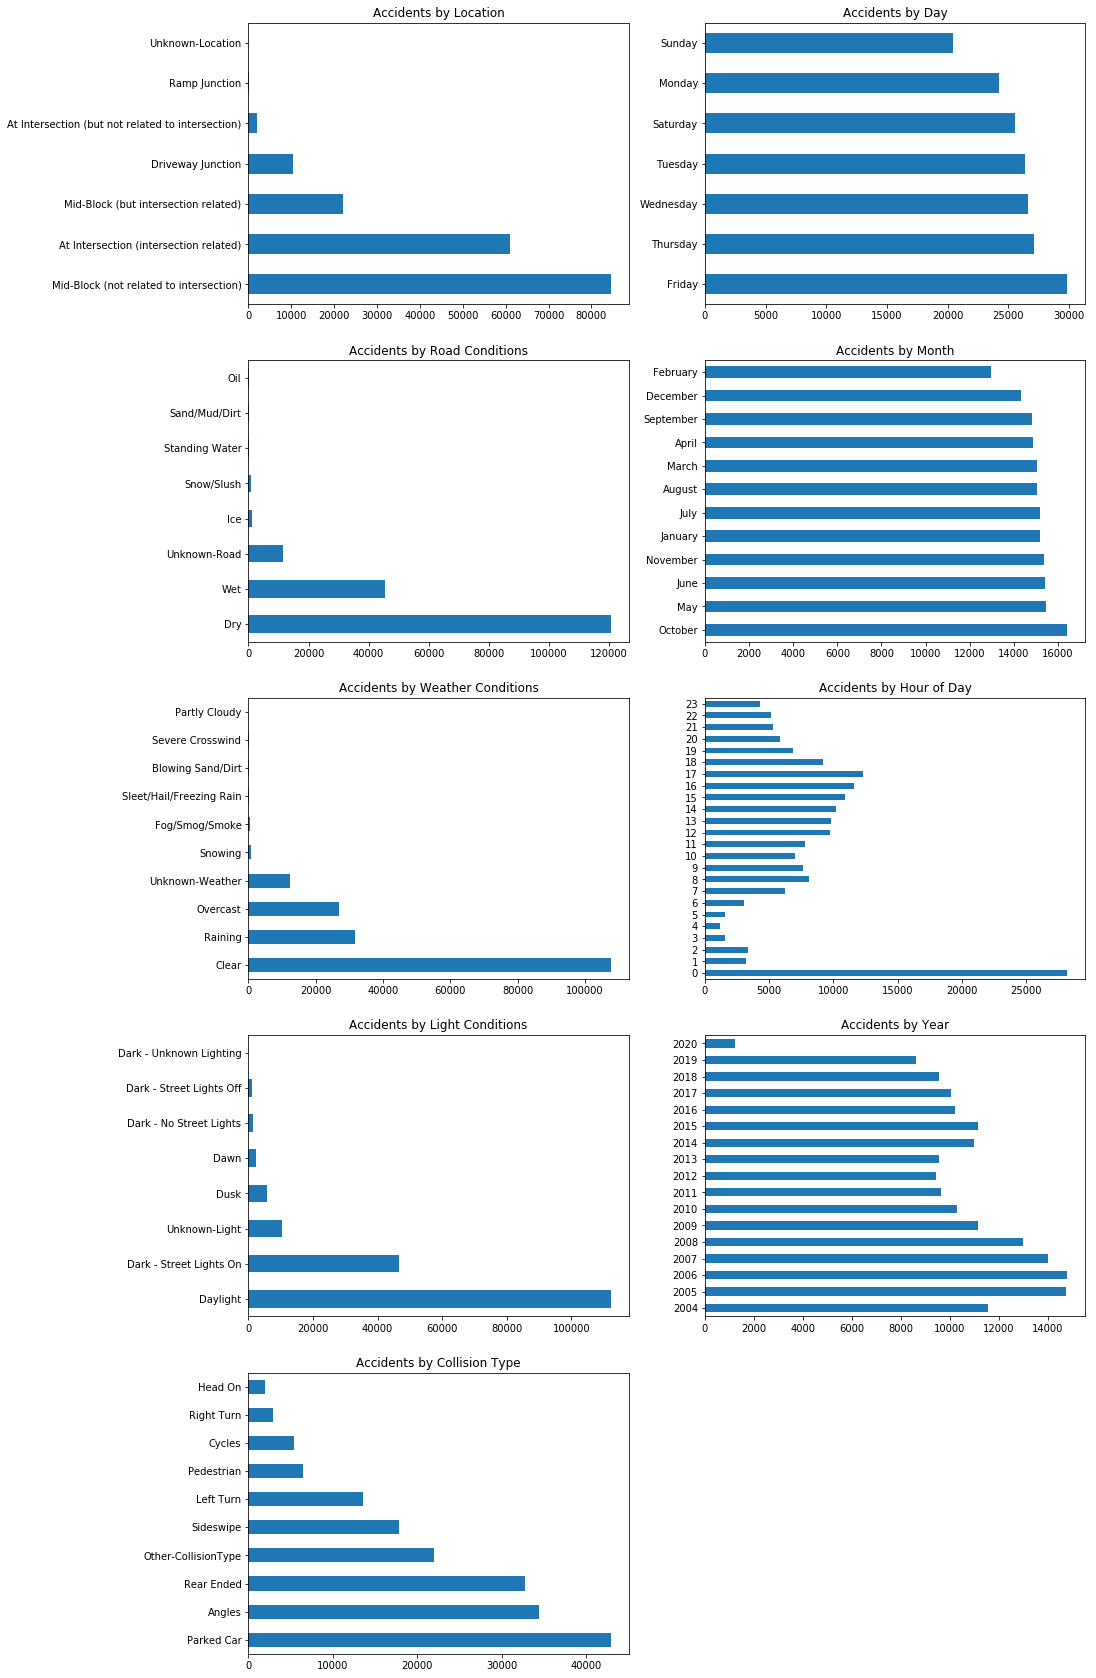

In [17]:
#Draw graphs for the data by different features
fig = plt.figure(figsize=(15,30)) 
fig_dims = (5, 2)

plt.subplot2grid(fig_dims, (0, 0))
df['LOCATION'].value_counts().plot(kind='barh', title='Accidents by Location')

plt.subplot2grid(fig_dims, (0, 1))
df['WEEKDAY'].value_counts().plot(kind='barh', title='Accidents by Day')

plt.subplot2grid(fig_dims, (1, 0))
df['ROAD'].value_counts().plot(kind='barh', title='Accidents by Road Conditions')

plt.subplot2grid(fig_dims, (1, 1))
df['NAMEOFMONTH'].value_counts().plot(kind='barh', title='Accidents by Month')

plt.subplot2grid(fig_dims, (2, 0))
df['WEATHER'].value_counts().plot(kind='barh', title='Accidents by Weather Conditions')

plt.subplot2grid(fig_dims, (2, 1))
df['HOUROFDAY'].value_counts().sort_index(ascending=True).plot(kind='barh', title='Accidents by Hour of Day')

plt.subplot2grid(fig_dims, (3, 0))
df['LIGHT'].value_counts().plot(kind='barh', title='Accidents by Light Conditions')

plt.subplot2grid(fig_dims, (3, 1))
df['YEAR'].value_counts().sort_index(ascending=True).plot(kind='barh', title='Accidents by Year')

plt.subplot2grid(fig_dims, (4, 0))
df['COLLISIONTYPE'].value_counts().plot(kind='barh', title='Accidents by Collision Type')


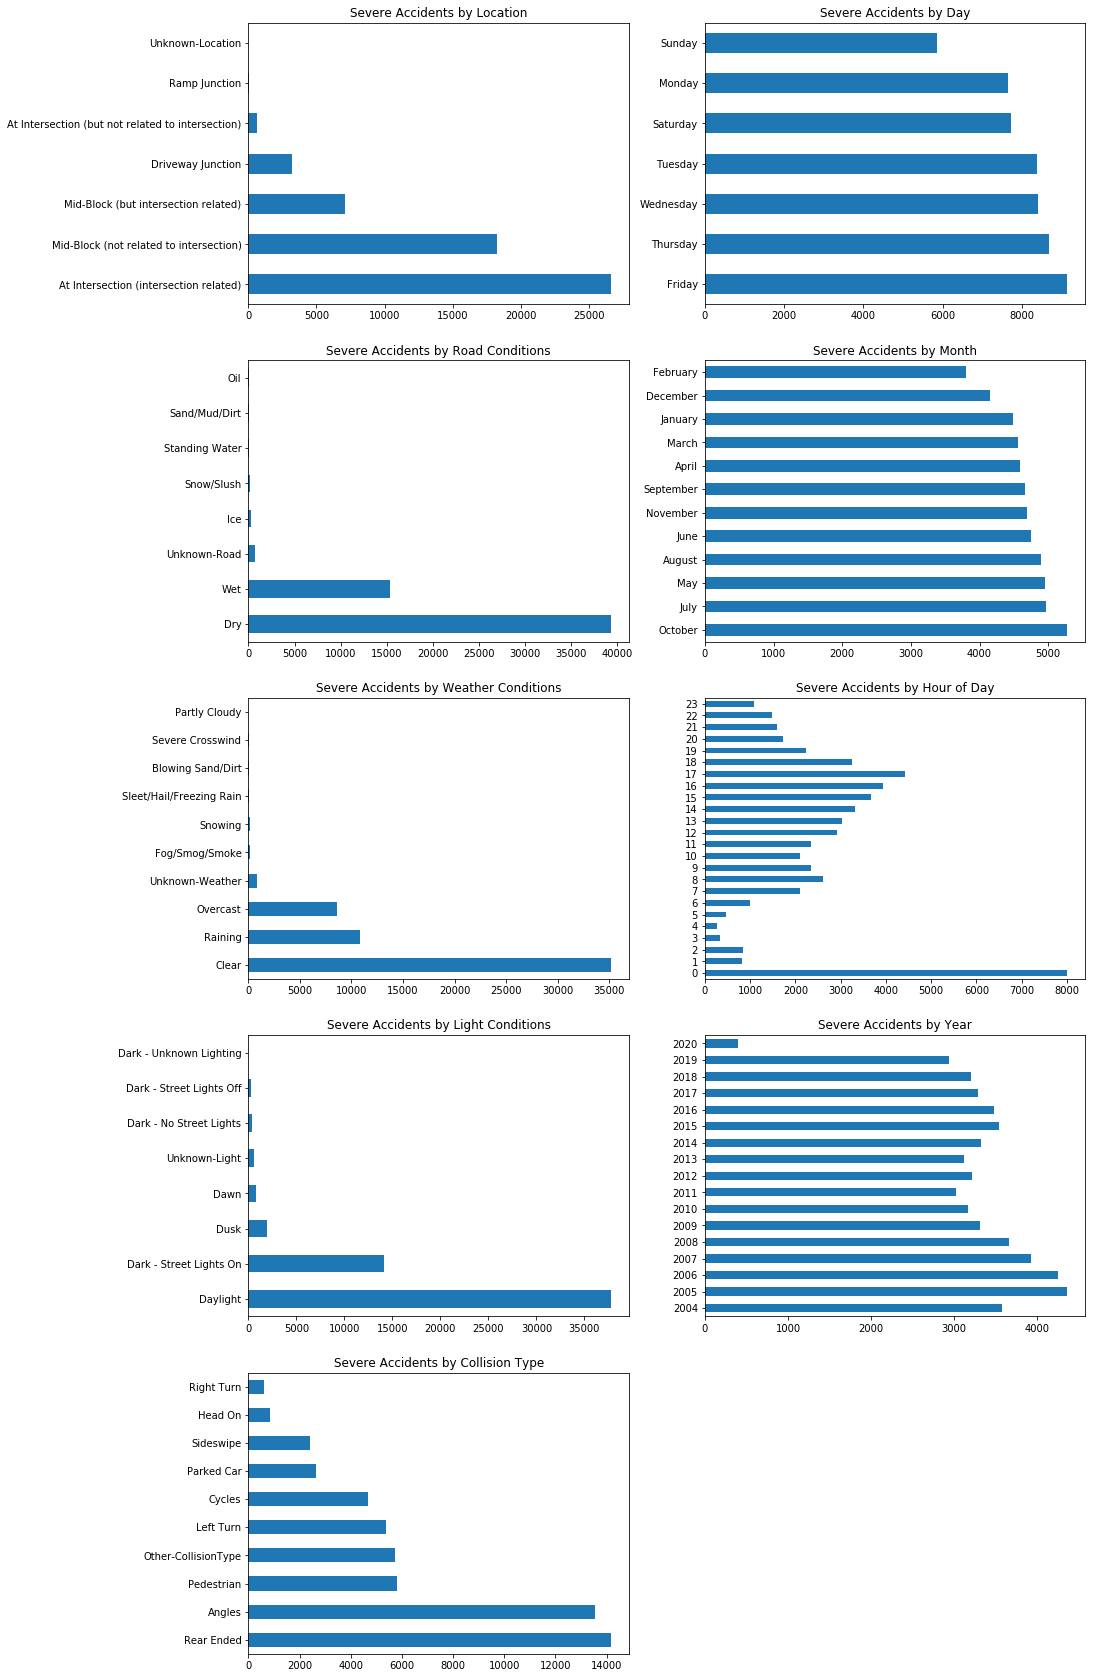

In [18]:
fig = plt.figure(figsize=(15,30)) 
fig_dims = (5, 2)

plt.subplot2grid(fig_dims, (0, 0))
df1['LOCATION'].value_counts().plot(kind='barh', title='Severe Accidents by Location')

plt.subplot2grid(fig_dims, (0, 1))
df1['WEEKDAY'].value_counts().plot(kind='barh', title='Severe Accidents by Day')

plt.subplot2grid(fig_dims, (1, 0))
df1['ROAD'].value_counts().plot(kind='barh', title='Severe Accidents by Road Conditions')

plt.subplot2grid(fig_dims, (1, 1))
df1['NAMEOFMONTH'].value_counts().plot(kind='barh', title='Severe Accidents by Month')

plt.subplot2grid(fig_dims, (2, 0))
df1['WEATHER'].value_counts().plot(kind='barh', title='Severe Accidents by Weather Conditions')

plt.subplot2grid(fig_dims, (2, 1))
df1['HOUROFDAY'].value_counts().sort_index(ascending=True).plot(kind='barh', title='Severe Accidents by Hour of Day')

plt.subplot2grid(fig_dims, (3, 0))
df1['LIGHT'].value_counts().plot(kind='barh', title='Severe Accidents by Light Conditions')

plt.subplot2grid(fig_dims, (3, 1))
df1['YEAR'].value_counts().sort_index(ascending=True).plot(kind='barh', title='Severe Accidents by Year')

plt.subplot2grid(fig_dims, (4, 0))
df1['COLLISIONTYPE'].value_counts().plot(kind='barh', title='Severe Accidents by Collision Type')

In [19]:
#Create a feature dataframe with selected columns from existing dataframe, without severity column
feature = df[['X', 'Y', 'COLLISIONTYPE', 'LOCATION', 'INATTENTION',
       'ALCOHOLUSE', 'WEATHER', 'ROAD', 'LIGHT', 'PEDROWNOTGRNT', 'SPEEDING',
       'YEAR', 'DAYOFMONTH', 'HOUROFDAY', 'WEEKDAY', 'NAMEOFMONTH']]

In [20]:
#Show all columns in a DataFrame
pd.set_option('display.max_columns', None)

In [21]:
#Use one hot encoding technique to convert categorical varables to binary variables and append them 
#to the feature Data Frame

feature = pd.concat([feature, pd.get_dummies(feature['COLLISIONTYPE'])], axis=1)
feature.drop(['COLLISIONTYPE'], axis = 1,inplace=True)

feature = pd.concat([feature, pd.get_dummies(feature['LOCATION'])], axis=1)
feature.drop(['LOCATION'], axis = 1,inplace=True)

feature = pd.concat([feature, pd.get_dummies(feature['WEATHER'])], axis=1)
feature.drop(['WEATHER'], axis = 1,inplace=True)

feature = pd.concat([feature, pd.get_dummies(feature['ROAD'])], axis=1)
feature.drop(['ROAD'], axis = 1,inplace=True)

feature = pd.concat([feature, pd.get_dummies(feature['LIGHT'])], axis=1)
feature.drop(['LIGHT'], axis = 1,inplace=True)

feature = pd.concat([feature, pd.get_dummies(feature['YEAR'])], axis=1)
feature.drop(['YEAR'], axis = 1,inplace=True)

feature = pd.concat([feature, pd.get_dummies(feature['DAYOFMONTH'])], axis=1)
feature.drop(['DAYOFMONTH'], axis = 1,inplace=True)

feature = pd.concat([feature, pd.get_dummies(feature['WEEKDAY'])], axis=1)
feature.drop(['WEEKDAY'], axis = 1,inplace=True)

feature = pd.concat([feature, pd.get_dummies(feature['NAMEOFMONTH'])], axis=1)
feature.drop(['NAMEOFMONTH'], axis = 1,inplace=True)

In [22]:
#Rename columns for meaningful names
feature.rename( columns={1:'DAY01', 2:'DAY02', 3:'DAY03', 4:'DAY04', 5:'DAY05', 6:'DAY06', 7:'DAY07', 
                    8:'DAY08', 9:'DAY09', 10:'DAY10', 11:'DAY11', 12:'DAY12', 13:'DAY13', 14:'DAY14', 
                    15:'DAY15', 16:'DAY16', 17:'DAY17', 18:'DAY18', 19:'DAY19', 20:'DAY20', 21:'DAY21', 
                    22:'DAY22', 23:'DAY23', 24:'DAY24', 25:'DAY25', 26:'DAY26', 27:'DAY27', 28:'DAY28', 
                    29:'DAY29', 30:'DAY30', 31:'DAY31'}, inplace=True )

In [23]:
feature = pd.concat([feature, pd.get_dummies(feature['HOUROFDAY'])], axis=1)
feature.drop(['HOUROFDAY'], axis = 1,inplace=True)

In [ ]:
#Rename columns for HourOfDay
feature.rename( columns={0:'HOUR00', 1:'HOUR01',  2:'HOUR02', 3:'HOUR03', 4:'HOUR04', 5:'HOUR05', 6:'HOUR06', 
                         7:'HOUR07', 8:'HOUR08', 9:'HOUR09', 10:'HOUR10', 11:'HOUR11', 12:'HOUR12', 13:'HOUR13', 
                         14:'HOUR14', 15:'HOUR15', 16:'HOUR16', 17:'HOUR17', 18:'HOUR18', 19:'HOUR19', 20:'HOUR20', 
                         21:'HOUR21', 22:'HOUR22', 23:'HOUR23'}, inplace=True )

Define feature sets

In [ ]:
feature.head()

,X,Y,INATTENTION,ALCOHOLUSE,PEDROWNOTGRNT,SPEEDING,Angles,Cycles,Head On,Left Turn,Other-CollisionType,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),Ramp Junction,Unknown-Location,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Unknown-Weather,Dry,Ice,Oil,Sand/Mud/Dirt,Snow/Slush,Standing Water,Unknown-Road,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Unknown-Light,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,DAY01,DAY02,DAY03,DAY04,DAY05,DAY06,DAY07,DAY08,DAY09,DAY10,DAY11,DAY12,DAY13,DAY14,DAY15,DAY16,DAY17,DAY18,DAY19,DAY20,DAY21,DAY22,DAY23,DAY24,DAY25,DAY26,DAY27,DAY28,DAY29,DAY30,DAY31,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,December,February,January,July,June,March,May,November,October,September,HOUR00,HOUR01,HOUR02,HOUR03,HOUR04,HOUR05,HOUR06,HOUR07,HOUR08,HOUR09,HOUR10,HOUR11,HOUR12,HOUR13,HOUR14,HOUR15,HOUR16,HOUR17,HOUR18,HOUR19,HOUR20,HOUR21,HOUR22,HOUR23
0,-122.323148,47.703140,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,-122.347294,47.647172,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,-122.334540,47.607871,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-122.334803,47.604803,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-122.306426,47.545739,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = feature
X[0:5]

,X,Y,INATTENTION,ALCOHOLUSE,PEDROWNOTGRNT,SPEEDING,Angles,Cycles,Head On,Left Turn,Other-CollisionType,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),Ramp Junction,Unknown-Location,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Unknown-Weather,Dry,Ice,Oil,Sand/Mud/Dirt,Snow/Slush,Standing Water,Unknown-Road,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Unknown-Light,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,DAY01,DAY02,DAY03,DAY04,DAY05,DAY06,DAY07,DAY08,DAY09,DAY10,DAY11,DAY12,DAY13,DAY14,DAY15,DAY16,DAY17,DAY18,DAY19,DAY20,DAY21,DAY22,DAY23,DAY24,DAY25,DAY26,DAY27,DAY28,DAY29,DAY30,DAY31,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,December,February,January,July,June,March,May,November,October,September,HOUR00,HOUR01,HOUR02,HOUR03,HOUR04,HOUR05,HOUR06,HOUR07,HOUR08,HOUR09,HOUR10,HOUR11,HOUR12,HOUR13,HOUR14,HOUR15,HOUR16,HOUR17,HOUR18,HOUR19,HOUR20,HOUR21,HOUR22,HOUR23
0,-122.323148,47.703140,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,-122.347294,47.647172,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,-122.334540,47.607871,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-122.334803,47.604803,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-122.306426,47.545739,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = df['SEVERITY']
y[0:5]

0    2
1    1
2    1
3    1
4    2
Name: SEVERITY, dtype: int64

In [ ]:
#NORMALIZE data
X = preprocessing.StandardScaler().fit(X).transform(X)
X

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


array([[ 0.24396521,  1.48477487, -0.43625795, ..., -0.17397454,
        -0.17172542, -0.15644764],
       [-0.56150856,  0.49122186, -0.43625795, ..., -0.17397454,
        -0.17172542, -0.15644764],
       [-0.13604278, -0.20645905, -0.43625795, ..., -0.17397454,
        -0.17172542, -0.15644764],
       ...,
       [ 0.79304133,  1.1280732 , -0.43625795, ..., -0.17397454,
        -0.17172542, -0.15644764],
       [-0.82912471,  1.05151358, -0.43625795, ..., -0.17397454,
        -0.17172542, -0.15644764],
       [ 1.37110942, -0.15061732, -0.43625795, ..., -0.17397454,
        -0.17172542, -0.15644764]])

In [ ]:
#Classification of Data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (144053, 140) (144053,)
Test set: (36014, 140) (36014,)


In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train);
print("Train set accuracy for Random Forest: {:.2%}".format(metrics.accuracy_score(y_train, rf.predict(X_train))))
predictions = rf.predict(X_test)
print("Test set accuracy for Random Forest: {:.2%}".format(metrics.accuracy_score(y_test, predictions)))
print("f1 Score: {:.2%}".format(f1_score(y_test, predictions, average='weighted')))
print("Jaccard: {:.2%}".format(jaccard_similarity_score(y_test, predictions)))


Train set accuracy for Random Forest: 99.99%
Test set accuracy for Random Forest: 73.73%
f1 Score: 70.03%
Jaccard: 73.73%


In [ ]:
#K Nearest Neighbor(KNN)
#Train Model and Predict  
from sklearn.neighbors import KNeighborsClassifier
k = 10
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
#yhat = neigh.predict(X_train)
print("Train set accuracy for nearest neighbors(KNN): {:.2%}".format(metrics.accuracy_score(y_train, neigh.predict(X_train))))
yhat = neigh.predict(X_test)
print("Test set accuracy for nearest neighbors(KNN): {:.2%}".format(metrics.accuracy_score(y_test, yhat)))
print("f1 Score: {:.2%}".format(f1_score(y_test, yhat, average='weighted')))
print("Jaccard: {:.2%}".format(jaccard_similarity_score(y_test, yhat)))


Train set accuracy for nearest neighbors(KNN): 74.49%
Test set accuracy for nearest neighbors(KNN): 71.37%
f1 Score: 65.10%
Jaccard: 71.37%


In [ ]:
#Decision Tree
#X_train, X_test, y_train, y_test

LoanPaidTree = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
LoanPaidTree.fit(X_train, y_train)
predLoanPaidTree = LoanPaidTree.predict(X_train)
print("Decision Trees's train set accuracy: {:.2%}".format(metrics.accuracy_score(y_train, predLoanPaidTree)))
predLoanPaidTree = LoanPaidTree.predict(X_test)
print("Decision Trees's test set accuracy: {:.2%}".format(metrics.accuracy_score(y_test, predLoanPaidTree)))
print("f1 Score: {:.2%}".format(f1_score(y_test, predLoanPaidTree, average='weighted')))
print("Jaccard: {:.2%}".format(jaccard_similarity_score(y_test, predLoanPaidTree)))

Decision Trees's train set accuracy: 74.39%
Decision Trees's test set accuracy: 74.06%
f1 Score: 68.61%
Jaccard: 74.06%


In [ ]:
#Logistic Regression
#Solvers:{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
print("LR train set accuracy: {:.2%}".format(metrics.accuracy_score(y_train, LR.predict(X_train))))
yhat = LR.predict(X_test)
#yhat_prob = LR.predict_proba(X_test)
print("LR test set accuracy: {:.2%}".format(metrics.accuracy_score(y_test, yhat)))
print("f1 Score: {:.2%}".format(f1_score(y_test, yhat, average='weighted')))
print("Jaccard: {:.2%}".format(jaccard_similarity_score(y_test, yhat)))

LR train set accuracy: 74.19%
LR test set accuracy: 74.16%
f1 Score: 68.98%
Jaccard: 74.16%


In [ ]:
from xgboost import XGBClassifier
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
yhat = model.predict(X_train)
print("XGBoost train set accuracy: {:.2%}".format(metrics.accuracy_score(y_train, yhat)))
yhat = model.predict(X_test)
print("XGBoost test set accuracy: {:.2%}".format(metrics.accuracy_score(y_test, yhat)))
print("f1 Score: {:.2%}".format(f1_score(y_test, yhat, average='weighted')))
print("Jaccard: {:.2%}".format(jaccard_similarity_score(y_test, yhat)))


C:\ProgramData\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\ProgramData\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)
C:\ProgramData\Anaconda3\lib\site-packages\distributed\utils.py:134: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [WinError 10065] A socket operation was attempted to an unreachable host
  % (host, default, e), RuntimeWarning)


XGBoost train set accuracy: 76.81%
XGBoost test set accuracy: 73.98%
f1 Score: 69.96%
Jaccard: 73.98%


In [ ]:
#clf = svm.SVC(kernel='linear', C=1.0, gamma=0.2, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=2000, class_weight=None, verbose=False, max_iter=-1, random_state=None)
#clf.fit(X_train, y_train) 
#yhat = clf.predict(X_train)
#print("SVM's train set accuracy: {:.2%}".format(metrics.accuracy_score(y_train, clf.predict(X_train))))
#yhat = clf.predict(X_test)
#print("SVM's test set accuracy: {:.2%}".format(metrics.accuracy_score(y_test, yhat)))
#print("f1 Score: {:.2%}".format(f1_score(y_test, yhat, average='weighted')))
#print("Jaccard: {:.2%}".format(jaccard_similarity_score(y_test, yhat)))
